In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
from pycaret.datasets import get_data#step1

In [58]:
get_data('index')
data = get_data('boston')# setp2


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [63]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [68]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Create pycaret Regression Model

In [89]:
from pycaret.regression import setup, compare_models, plot_model, predict_model, save_model, load_model  # step3

In [71]:
s = setup(data, target="medv", silent=True) #step4

,Description,Value
0,session_id,1633
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


In [72]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [74]:
data.rad.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [76]:
data.chas.unique()

array([0, 1], dtype=int64)

In [78]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.2632,11.1993,3.2470,0.8654,0.1504,0.1173,0.0410
rf,Random Forest Regressor,2.3730,12.3746,3.4153,0.8495,0.1517,0.1190,0.1240
et,Extra Trees Regressor,2.2756,13.0149,3.4202,0.8421,0.1453,0.1118,0.1150
lightgbm,Light Gradient Boosting Machine,2.4090,14.2205,3.5302,0.8353,0.1576,0.1226,0.2550
ada,AdaBoost Regressor,2.9901,18.2916,4.1444,0.7851,0.1877,0.1561,0.0420
dt,Decision Tree Regressor,3.2157,23.6675,4.6342,0.7226,0.2108,0.1661,0.0090
ridge,Ridge Regression,3.3898,24.3087,4.7631,0.7165,0.2424,0.1667,0.0080
br,Bayesian Ridge,3.3797,24.5727,4.7783,0.7164,0.2394,0.1662,0.0090
lr,Linear Regression,3.4386,24.4362,4.7971,0.7134,0.2486,0.1683,0.9220
lasso,Lasso Regression,3.7645,29.9118,5.3038,0.6733,0.2524,0.1774,0.0130


In [79]:
print(best_model)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1633, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


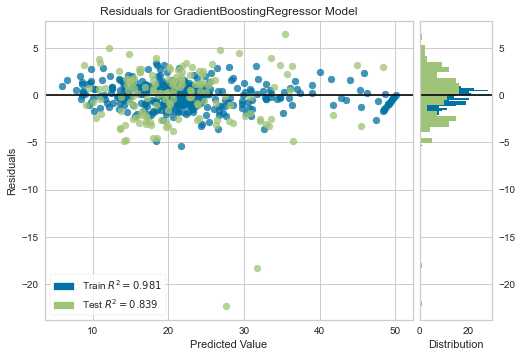

In [81]:
plot_model(best_model, plot='residuals')

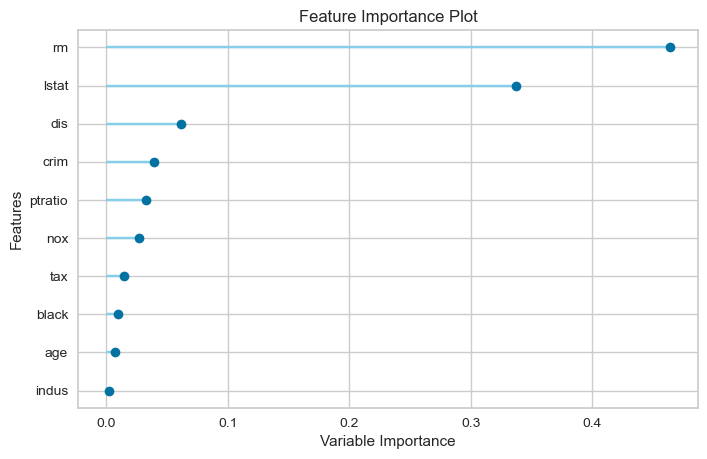

In [82]:
plot_model(best_model, plot='feature')

In [85]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.2422,11.1396,3.3376,0.8395,0.1394,0.1124


,crim,zn,indus,nox,rm,age,dis,tax,ptratio,black,...,rad_2,rad_24,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,medv,Label
0,0.79041,0.0,9.90,0.544,6.122,52.799999,2.6403,304.0,18.400000,396.899994,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.100000,24.380459
1,12.80230,0.0,18.10,0.740,5.854,96.599998,1.8956,666.0,20.200001,240.520004,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.800000,10.041552
2,0.11504,0.0,2.89,0.445,6.163,69.599998,3.4952,276.0,18.000000,391.829987,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.400000,24.016290
3,0.05497,0.0,5.19,0.515,5.985,45.400002,4.8122,224.0,20.200001,396.899994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,19.000000,20.947047
4,9.32909,0.0,18.10,0.713,6.185,98.699997,2.2616,666.0,20.200001,396.899994,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,14.100000,14.640775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.03150,95.0,1.47,0.403,6.975,15.300000,7.6534,402.0,17.000000,396.899994,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.900002,32.134401
148,0.06151,0.0,5.19,0.515,5.968,58.500000,4.8122,224.0,20.200001,396.899994,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,18.700001,21.334888
149,0.08447,0.0,4.05,0.510,5.859,68.699997,2.7019,296.0,16.600000,393.230011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.600000,23.053501
150,5.09017,0.0,18.10,0.713,6.297,91.800003,2.3682,666.0,20.200001,385.089996,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.100000,16.950137


In [86]:
predictions = predict_model(best_model, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.3865,4.5311,2.1286,0.9463,0.0952,0.0713


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.889990
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.063373
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.350795
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.681986
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.873090


# Save model

In [88]:
save_model(best_model, 'gbr_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='medv',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

# Load model

In [90]:
loaded_model = load_model("gbr_model_pipeline")
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='medv',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_dec

In [92]:
df1 = predict_model(loaded_model, data)
df1

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.3865,4.5311,2.1286,0.9463,0.0952,0.0713


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.889990
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.063373
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.350795
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.681986
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.873090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,22.513375
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,19.717296
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,24.267021
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,23.806267


In [93]:
df1.to_excel("boston_predicted.xlsx", index=False)